### SESSION 21 - MULTIINDEX SERIES AND DATAFRAME

In [1]:
import numpy as np
import pandas as pd

#### Series is 1D and DataFrames are 2D objects
- But why?
- And what exactly is index?

In [2]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8], index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [3]:
# The problem
#a['cse']

#### Multiindex Series (also known as Hirarchical Indexing)
- In pandas, a MultiIndex, also known as hierarchical indexing, allows you to have multiple index levels within single axis. 
- This is particularly useful when you're working with higher-dimensional data that can be naturally represented as a hierarchical structure. 
- MultiIndex can be applied to both rows (index) and columns, but we'll focus on row-based MultiIndexing here
- **pd.MultiIndex** is a class in the pandas library in Python that represents a multi-level or hierarchical index. 
- It allows you to have multiple levels of indices on one axis, either for rows or columns in a DataFrame.

- **syntax = pd.MultiIndex(levels=[level_values1, level_values2, ...],codes=[code_values1, code_values2, ...],names=[name1, name2, ...])**
    - parameters:

        - **levels:** 
        A list of arrays containing the unique values for each level of the MultiIndex.

        - **codes:** 
        A list of arrays containing the integer codes that represent the labels for each level. The codes are indices into the corresponding levels.

        - **names:** 
        A list of names for each level. Names are optional and are used to provide meaningful labels to the levels.
              
    

**Creating a MultiIndex (hierarchical index) object**
- We can create a MultiIndex in several ways. One common way is to pass a list of arrays or tuples as the index when creating a DataFrame
- Also you can create a MultiIndex by using the **pd.MultiIndex** constructor or
A MultiIndex can be created from a list of arrays (using **MultiIndex.from_arrays()**), an array of tuples (using **MultiIndex.from_tuples()**), a crossed set of iterables (using **MultiIndex.from_product()**), or a DataFrame (using **MultiIndex.from_frame()**). 
- The Index constructor will attempt to return a MultiIndex when it is passed a list of tuples.


In [4]:
# pd.MultiIndex.from_tuples():
index_val = [('cse',2019),('cse',2020),('cse',2021),('ece',2019),('ece',2020),('ece',2021)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021)],
           )

In [5]:
# pd.MultiIndex.from_product() 
# it's like cartesion product
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [6]:
# level attribute


#### Creating a series with multiindex objects

In [7]:
# # Creating MultiIndex
multi_i = pd.MultiIndex.from_product([
    ['cse','ece'],
    [2019,2020,2021]])

# Creating a Series with the MultiIndex
ms = pd.Series([1,2,3,4,5,6], index=multi_i)
ms

cse  2019    1
     2020    2
     2021    3
ece  2019    4
     2020    5
     2021    6
dtype: int64

In [8]:
# how to fetch items from such a series
s[]

SyntaxError: invalid syntax (2368363620.py, line 2)

#### unstack() function :
- Convert the multiindex series into Dataframe

In [9]:
temp = ms.unstack()
temp

,2019,2020,2021
cse,1,2,3
ece,4,5,6


#### stack() function :
- Convert the dataframe into multiindex series

In [10]:
temp.stack()

cse  2019    1
     2020    2
     2021    3
ece  2019    4
     2020    5
     2021    6
dtype: int64

#### Main purpose of MultiIndexing Objects:
- To representation of high dimensional data into lower dimensions like 1d(Series) and 2D(DataFrame)

### MutiIndex DataFrame:

In [11]:
branch_df1 = pd.DataFrame(
    [
        [1,2],[3,4],
        [5,6],[7,8],
        [9,10],[11,12],     
    ],
    index = multiindex,
    columns = ['avg_package','students'])
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
ece 2019            7         8
    2020            9        10
    2021           11        12

In [12]:
branch_df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6


In [13]:
branch_df1.loc['ece']

,avg_package,students
2019,7,8
2020,9,10
2021,11,12


In [14]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
ece  2019     7
     2020     9
     2021    11
Name: avg_package, dtype: int64

In [15]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
ece  2019     8
     2020    10
     2021    12
Name: students, dtype: int64

**Are columns really different from index?**

- In pandas, if you transpose a DataFrame using the T attribute or the transpose() method, the columns effectively become the index and vice versa.
- After transposing, what were originally columns become the index, and what were originally the index becomes the columns.

**MultiIndex DataFrame based on columns**
- The MultiIndex has two levels: the first level consists of city names ('delhi' and 'mumbai'), and the second level consists of attributes ('avg_package' and 'students').

In [16]:
# multiindex in columns
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
    ],
    index = [2019,2020,2021],
    columns = pd.MultiIndex.from_product([
        ['delhi','mumbai'],['avg_package','students']
    ])
)
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0

In [17]:
branch_df2['delhi']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6


In [18]:
branch_df2['mumbai']

,avg_package,students
2019,0,0
2020,0,0
2021,0,0


In [19]:
branch_df2['delhi']['avg_package']

2019    1
2020    3
2021    5
Name: avg_package, dtype: int64

In [20]:


branch_df2.loc[2020]

delhi   avg_package    3
        students       4
mumbai  avg_package    0
        students       0
Name: 2020, dtype: int64

**Multiindex dataframe in terms of both cols and index**

In [21]:
branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],   
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([
        ['delhi','mumbai'],
        ['avg_package','students']
    ])
)
branch_df3 # 4D 

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
ece 2019           7        8           0        0
    2020           9       10           0        0
    2021          11       12           0        0

#### Stacking and Unstacking:

**Unstacking:**
- Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

- In simple words, unstacking is a selecting one of the levels in the multi-index to becomes the new columns.

- Stacking and unstacking are operations in pandas that transform a multi-index DataFrame between a wide and long format. 
- **In a wide format,** rows represent unique index combinations, and columns represent unique combinations of index and column levels. 
- **In a long format,** each row represents a unique index combination along with one column level, with values stored in a separate column. 

- Stacking moves a column level to become an innermost index level, while unstacking does the opposite, moving an innermost index level to become a column level. 

- These operations facilitate reshaping data for different analyses or visualizations.


In [22]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
ece 2019            7         8
    2020            9        10
    2021           11        12

**unstack() method:**
- In simple words, unstack() method specified index labels becomes new columns and return new dataframe.

- It's used to pivot specified levels of the index labels into new columns, returning a new DataFrame.

- **syntax:DataFrame.unstack(self, level=-1, fill_value=None)**
    - **level (default is 1):** Specifies the level(s) of the index to unstack. If you have a MultiIndex, you can choose which level(s) you want to move to columns.
    - **fill_value:** If there are missing values after unstacking, you can specify a value to replace those missing values. By default, missing values are filled with NaN.

In [23]:
branch_df1.unstack(level=1)

avg_package           students          
           2019 2020 2021     2019 2020 2021
cse           1    3    5        2    4    6
ece           7    9   11        8   10   12

In [24]:
branch_df1.unstack(level=0)

avg_package     students    
             cse ece      cse ece
2019           1   7        2   8
2020           3   9        4  10
2021           5  11        6  12

In [25]:
# Dataframe convert into series
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     7
             2020  cse     3
                   ece     9
             2021  cse     5
                   ece    11
students     2019  cse     2
                   ece     8
             2020  cse     4
                   ece    10
             2021  cse     6
                   ece    12
dtype: int64

**stack() method:**
- column to row
- tack the prescribed level(s) from columns to index.

- Return a reshaped DataFrame or Series having a multi-level
index with one or more new inner-most levels compared to the current
DataFrame. 
- The new inner-most levels are created by pivoting the
columns of the current dataframe:

  - if the columns have a single level, the output is a Series;
  - if the columns have multiple levels, the new index
    level(s) is (are) taken from the prescribed level(s) and
    the output is a DataFrame.


In [26]:
branch_df1.unstack()

avg_package           students          
           2019 2020 2021     2019 2020 2021
cse           1    3    5        2    4    6
ece           7    9   11        8   10   12

In [27]:
# Here most inner columns becomes row
branch_df1.unstack().stack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
ece 2019            7         8
    2020            9        10
    2021           11        12

In [28]:
branch_df1.unstack().stack().stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
ece  2019  avg_package     7
           students        8
     2020  avg_package     9
           students       10
     2021  avg_package    11
           students       12
dtype: int64

In [29]:
# Example
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0

In [30]:
# Most-inner columns becomes row in stack() method
branch_df2.stack()

delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0

In [31]:
# stacking 1one more level
branch_df2.stack().stack()

2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
dtype: int64

In [32]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
ece 2019           7        8           0        0
    2020           9       10           0        0
    2021          11       12           0        0

In [33]:
branch_df3.unstack()

delhi                                   mumbai                     \
    avg_package           students           avg_package           students   
           2019 2020 2021     2019 2020 2021        2019 2020 2021     2019   
cse           1    3    5        2    4    6           0    0    0        0   
ece           7    9   11        8   10   12           0    0    0        0   

               
               
    2020 2021  
cse    0    0  
ece    0    0

In [34]:
# 4D sries
branch_df3.unstack().unstack()

delhi   avg_package  2019  cse     1
                           ece     7
                     2020  cse     3
                           ece     9
                     2021  cse     5
                           ece    11
        students     2019  cse     2
                           ece     8
                     2020  cse     4
                           ece    10
                     2021  cse     6
                           ece    12
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
dtype: int64

In [35]:
branch_df3.stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
ece 2019 avg_package      7       0
         students         8       0
    2020 avg_package      9       0
         students        10       0
    2021 avg_package     11       0
         students        12       0

In [36]:
branch_df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
ece  2019  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
     2020  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2021  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
dtype: int64

#### Working with multiindex dataframe
- We can use pandas DataFrame methods, functions, and attributes on a MultiIndex DataFrame just like you would on a regular DataFrame.

In [37]:
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
ece 2019           7        8           0        0
    2020           9       10           0        0

In [38]:
branch_df3.shape

(6, 4)

In [39]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('cse', 2019) to ('ece', 2021)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   6 non-null      int64
 1   (delhi, students)      6 non-null      int64
 2   (mumbai, avg_package)  6 non-null      int64
 3   (mumbai, students)     6 non-null      int64
dtypes: int64(4)
memory usage: 492.0+ bytes


In [40]:
branch_df3.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   (delhi, avg_package, 2019)   2 non-null      int64
 1   (delhi, avg_package, 2020)   2 non-null      int64
 2   (delhi, avg_package, 2021)   2 non-null      int64
 3   (delhi, students, 2019)      2 non-null      int64
 4   (delhi, students, 2020)      2 non-null      int64
 5   (delhi, students, 2021)      2 non-null      int64
 6   (mumbai, avg_package, 2019)  2 non-null      int64
 7   (mumbai, avg_package, 2020)  2 non-null      int64
 8   (mumbai, avg_package, 2021)  2 non-null      int64
 9   (mumbai, students, 2019)     2 non-null      int64
 10  (mumbai, students, 2020)     2 non-null      int64
 11  (mumbai, students, 2021)     2 non-null      int64
dtypes: int64(12)
memory usage: 208.0+ bytes


In [41]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
ece  2019    False
     2020    False
     2021    False
dtype: bool

In [42]:
branch_df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False

In [43]:
# examples
branch_df3.head()
branch_df3.shape
branch_df3.info()
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('cse', 2019) to ('ece', 2021)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   6 non-null      int64
 1   (delhi, students)      6 non-null      int64
 2   (mumbai, avg_package)  6 non-null      int64
 3   (mumbai, students)     6 non-null      int64
dtypes: int64(4)
memory usage: 492.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False

**Extracting rows and columns:**

To extract rows and columns from a MultiIndex DataFrame, you can use various methods, including .loc[], .iloc[], and other DataFrame indexing techniques. Here are some examples:

In [44]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
ece 2019           7        8           0        0
    2020           9       10           0        0
    2021          11       12           0        0

In [45]:
# single row 
branch_df3.loc[('cse',2019)]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: (cse, 2019), dtype: int64

In [46]:
# multiple row (similar to indexing)
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2020           9       10           0        0

In [47]:
branch_df3.iloc[0:5:3]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
ece 2019           7        8           0        0

In [48]:
# Extracting column
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
ece  2019     8
     2020    10
     2021    12
Name: students, dtype: int64

In [49]:
# multiple columns
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
ece 2019        8           0
    2020       10           0
    2021       12           0

In [50]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2020,10,0


#### Sorting Index in MultiIndex:
Sorting the index in a MultiIndex DataFrame can be done using the sort_index() method.

In [51]:
# default 
branch_df3.sort_index()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
ece 2019           7        8           0        0
    2020           9       10           0        0
    2021          11       12           0        0

In [52]:
# both -> descending sorting 
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2021          11       12           0        0
    2020           9       10           0        0
    2019           7        8           0        0
cse 2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [53]:
# Sorting on level (0) and level (1)
branch_df3.sort_index(ascending=[False,True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           7        8           0        0
    2020           9       10           0        0
    2021          11       12           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0

In [54]:
# sorting on specific level
branch_df3.sort_index(level=1, ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2021          11       12           0        0
cse 2021           5        6           0        0
ece 2020           9       10           0        0
cse 2020           3        4           0        0
ece 2019           7        8           0        0
cse 2019           1        2           0        0

#### Transpose MultiIndex DataFrame:
**transpose() method:**
- In pandas, the transpose() method is used to transpose the rows and columns of a DataFrame. 
- It switches the rows and columns, effectively converting the rows into columns and vice versa.
- Keep in mind that after transposing, the index becomes the columns, and the columns become the index. 
- If your original DataFrame had column names, they would become the MultiIndex after transposing.

In [55]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
ece 2019           7        8           0        0
    2020           9       10           0        0
    2021          11       12           0        0

In [56]:
branch_df3.transpose()

cse            ece          
                   2019 2020 2021 2019 2020 2021
delhi  avg_package    1    3    5    7    9   11
       students       2    4    6    8   10   12
mumbai avg_package    0    0    0    0    0    0
       students       0    0    0    0    0    0

**swaplevel() method:**
- The swaplevel() method in pandas is used to swap levels of a MultiIndex in a DataFrame. 
- This can be particularly useful when you want to interchange the order of levels in a MultiIndex DataFrame. 
- The method is applied to the DataFrame's index and can be useful for reorganizing or reshaping the data.
- Default is to swap the two innermost levels of the index.

**Syntax:DataFrame.swaplevel(i=-2, j=-1, axis=0)**
- Swap levels i and j in a MultiIndex.
- Default is to swap the two innermost levels of the index.

    - **i, j :**(int or str)
        - Levels of the indices to be swapped. Can pass level name as string.

    - **axis :**{0 or ‘index’, 1 or ‘columns’}, default 0
        - The axis to swap levels on. 0 or ‘index’ for row-wise, 1 or ‘columns’ for column-wise.

In [57]:
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2019 ece           7        8           0        0
2020 ece           9       10           0        0
2021 ece          11       12           0        0

In [58]:
# swaplevel with default and column
branch_df3.swaplevel(0,axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
ece 2019           7        8           0        0
    2020           9       10           0        0
    2021          11       12           0        0

#### Long format Vs Wide format
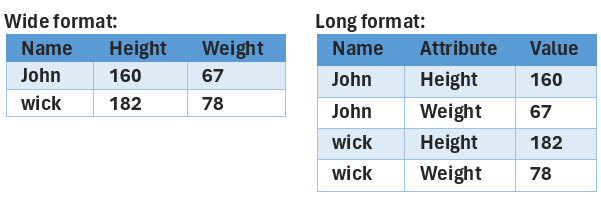

**Wide format:**
- Wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.
- **A wide format contains values that do not repeat in the first column.**
- Wide format data common sources of obtain data is:
    - Government Databases
    - CSV Files from Statistical Agencies
    - Machine Learning Datasets
    
**Long format: (tidy data):**
- Long format is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.
- **A long format contains values that do repeat in the first column.**
- Long format data common sources of obtain data is:
    - Surveys and Questionnaires
    - Time seires data
    - Sensor data
    - Clinical Trials and Medical Studies:

**What is difference between them?**
- the choice between long and wide formats in data storage and analysis is often dependent on the problem statement, the nature of the data, and the specific analysis or tasks you plan to perform.

**melt() function:**
- In pandas, melt() function was used to transform the dataset from a Wide format into a Long format.
- **Syntax: pd.melt(frame, id_vars=None, value_vars=None,
 var_name=None, value_name='value', col_level=None)**
    - **frame :** DataFrame
    - **id_vars[tuple, list, or ndarray, optional]:** 
        - Column(s) to use as identifier variables.
    - **value_vars[tuple, list, or ndarray, optional]:** 
        - Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
    - **var_name[scalar]:** 
        - Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
    - **value_name[scalar, default ‘value’]:** 
        - Name to use for the ‘value’ column.
    - **col_level[int or string, optional]:** 
        - If columns are a MultiIndex then use this level to melt.

In [59]:
# melt -> wide to long
pd.DataFrame({'cse':[120]})

,cse
0,120


In [60]:
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [61]:
# melt -> branch with year
pd.DataFrame({'cse':[120], 'ece':[100], 'mech':[50]})

,cse,ece,mech
0,120,100,50


In [62]:
pd.DataFrame(
    {'cse':[120], 'ece':[100], 
     'mech':[50]}
).melt(var_name='branch', value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [63]:
# melt -> branch with year
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [64]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [65]:
# melt -> real world example
death = pd.read_csv('DATASETS/S21/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('DATASETS/S21/time_series_covid19_confirmed_global.csv')

In [73]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [72]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [69]:
death.shape

(289, 1081)

In [71]:
confirm.shape

(289, 1081)

In [ ]:
# Creating new dataframe using death & confirm datasets

In [74]:
#melt -> wide to long
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [78]:
death = death.melt(id_vars=
           ['Province/State','Country/Region','Lat','Long'],
          var_name='date',value_name='number_of_deaths')
confirm = confirm.melt(id_vars=
           ['Province/State','Country/Region','Lat','Long'],
          var_name='date',value_name='number_of_cases')

In [81]:
death.head()

,Province/State,Country/Region,Lat,Long,date,number_of_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [82]:
confirm.head()

,Province/State,Country/Region,Lat,Long,date,number_of_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [85]:
confirms = confirm.merge(death, 
             on=['Province/State','Country/Region','Lat','Long','date'])
confirms[['Country/Region','date','number_of_deaths','number_of_cases']]

,Country/Region,date,number_of_deaths,number_of_cases
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,5708,703228
311249,Winter Olympics 2022,1/2/23,0,535
311250,Yemen,1/2/23,2159,11945
311251,Zambia,1/2/23,4024,334661
